## Technical Requirements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

import warnings
warnings.filterwarnings('ignore')
plt.rc("figure", figsize=(16, 5))


In [2]:
import sktime
sktime.__version__

'0.11.0'

In [3]:
file = Path('../../datasets/Ch12/Residential_Energy_Consumption.xlsx')
col = ['Month','Total Energy Consumed by the Residential Sector']
df = pd.read_excel(file, index_col='Month', usecols=col)
df.columns = ['energy_consumption']

<AxesSubplot:xlabel='Month'>

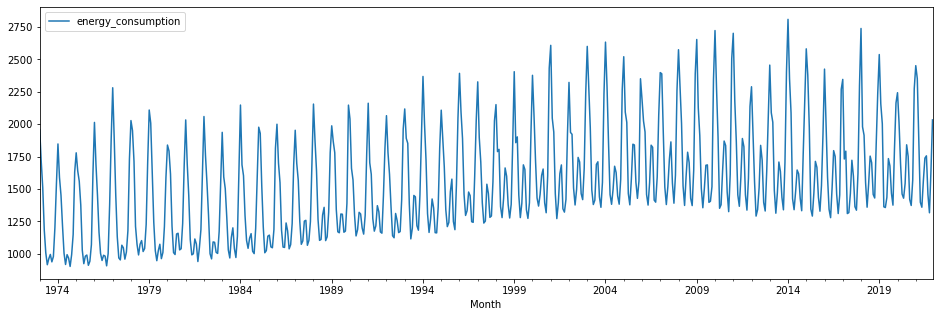

In [4]:
df.plot()

In [9]:
df.tail()

,energy_consumption
Month,
2021-08-01,1755.212
2021-09-01,1456.901
2021-10-01,1315.799
2021-11-01,1644.306
2021-12-01,2032.352


In [7]:
from sktime.regression.compose import ComposableTimeSeriesForestRegressor


<AxesSubplot:xlabel='Month'>

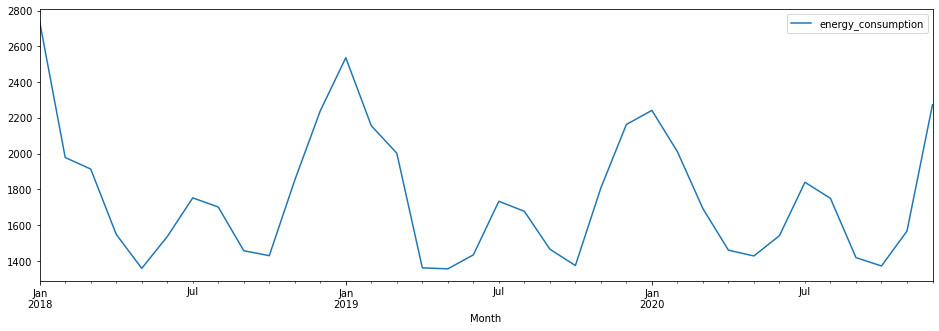

In [12]:
df.loc['2018':'2020'].plot()

In [14]:
df.shape

(588, 1)

In [424]:
train = df.loc[:'2019']
test = df.loc['2020':]

<AxesSubplot:xlabel='Month'>

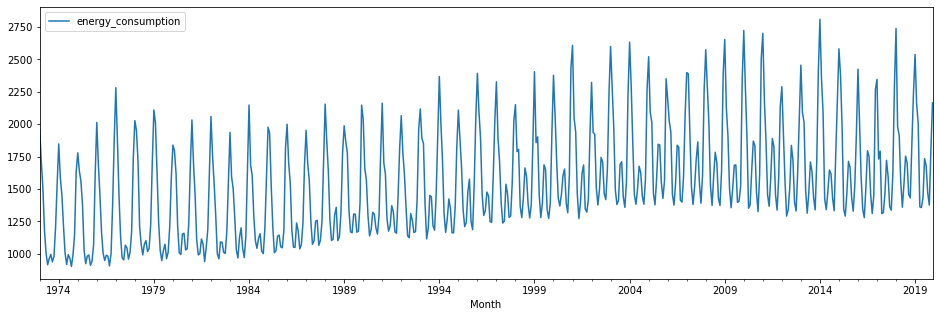

In [27]:
train.plot()

In [436]:
test.shape
train.shape
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.compose import TransformedTargetForecaster
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sktime.transformations.series.detrend import Deseasonalizer
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error as mape, median_squared_percentage_error as mspe
from sktime.forecasting.compose import RecursiveTimeSeriesRegressionForecaster, RecursiveTabularRegressionForecaster
from sktime.forecasting.arima import AutoARIMA

from sktime.forecasting.compose import make_reduction

from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_evaluation import evaluate

In [395]:
from sktime.forecasting.naive import NaiveForecaster

# naive_forecaster_last = NaiveForecaster(strategy="mean")
# naive_forecaster_last.fit(train.values)
# y_last = naive_forecaster_last.predict(fh)



In [397]:
test.shape

(24, 1)

In [238]:
test.tail()

,energy_consumption
Month,
2021-08-01,1755.212
2021-09-01,1456.901
2021-10-01,1315.799
2021-11-01,1644.306
2021-12-01,2032.352


In [244]:
test.index

DatetimeIndex(['2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01'],
              dtype='datetime64[ns]', name='Month', freq='MS')

In [420]:
test

<function __main__.test(**kwargs)>

In [425]:
fh = ForecastingHorizon(np.arange(len(test)) + 1)  # forecasting horizon
fh

ForecastingHorizon([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24],
           dtype='int64', is_relative=True)

In [531]:
def play(kwargs):
    if kwargs:
        print(kwargs)
    else:
        print('NA')

In [498]:
[]

In [500]:
grades0

{'John': 95, 'Jennifer': 98}

In [598]:
ForecastingHorizon(np.arange(test.size) + 1)

ForecastingHorizon([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24],
           dtype='int64', is_relative=True)

In [590]:
def make_forecast(data, n, regressor, window=12):
    fh = ForecastingHorizon(np.arange(n) + 1)
    if not isinstance(regressor, NaiveForecaster):
        model = make_reduction(regressor, window_length=window).fit(data.values)
    else:
        print('yes')
        model = regressor.fit(data.values)
    forecast = pd.Series(
            model.predict(fh=fh).reshape(-1),
            index= test.index
                    )
    return forecast
        
    

In [599]:
test.size

24

In [601]:
train, test = temporal_train_test_split(df, test_size=24)


regressors = {'Naive' : NaiveForecaster(strategy='last', sp=12),
            'Linear Regression': LinearRegression(),
             'K-Nearest Neighbors': KNeighborsRegressor(),
             'Random Forest': RandomForestRegressor(),
             'Gradient Boosting': GradientBoostingRegressor()}


for k, reg in regressors.items():
    print(reg)
    test[k] = make_forecast(train, len(test), regressor=reg , window=12)

NaiveForecaster(sp=12)
yes
LinearRegression()
KNeighborsRegressor()
RandomForestRegressor()
GradientBoostingRegressor()


In [602]:
test.size

144

array([<AxesSubplot:xlabel='Month'>, <AxesSubplot:xlabel='Month'>,
       <AxesSubplot:xlabel='Month'>, <AxesSubplot:xlabel='Month'>,
       <AxesSubplot:xlabel='Month'>, <AxesSubplot:xlabel='Month'>],
      dtype=object)

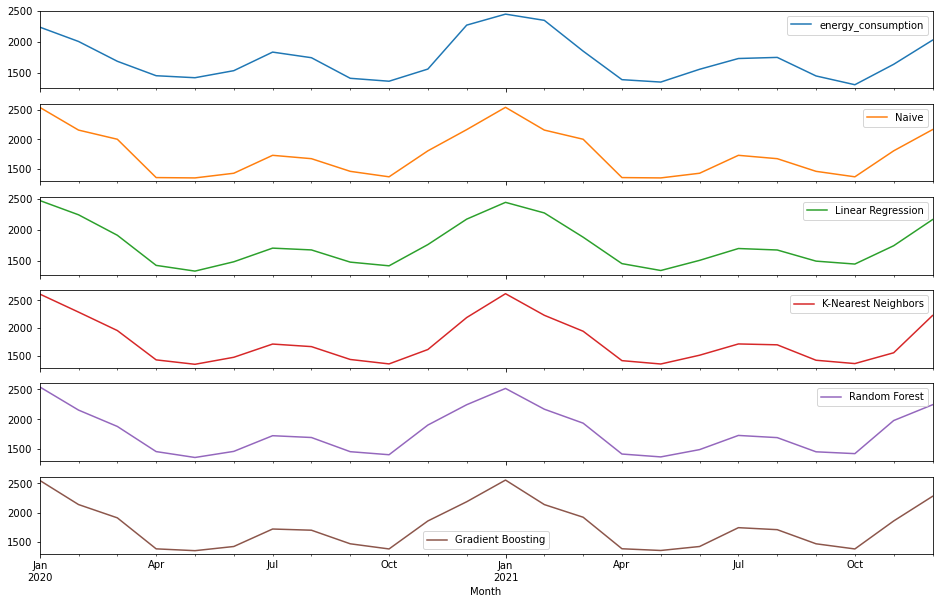

In [605]:
test.plot(subplots=True, figsize=(16, 10))

In [589]:
isinstance(rf, RandomForestRegressor)

True

In [564]:
naive = NaiveForecaster(strategy='last', sp=12)
naive

NaiveForecaster(sp=12)

In [477]:
rf = RandomForestRegressor(n_estimators=100)
lr = LinearRegression()
knn = KNeighborsRegressor(n_neighbors=5)
model_naive = NaiveForecaster(strategy='last', sp=12)
GradientBoostingRegressor()
model_rf = make_reduction(rf, window_length=12).fit(train.values)
model_lr = make_reduction(lr, window_length=12)
model_knn = make_reduction(knn, window_length=12)

In [478]:
model_rf.predict(1)

array([[2552.49501]])

In [429]:
model_rf.fit(train.values)
model_lr.fit(train.values)
model_knn.fit(train.values)
model_naive.fit(train.values)

NaiveForecaster(sp=12)

In [430]:
model_rf

RecursiveTabularRegressionForecaster(estimator=RandomForestRegressor(),
                                     window_length=12)

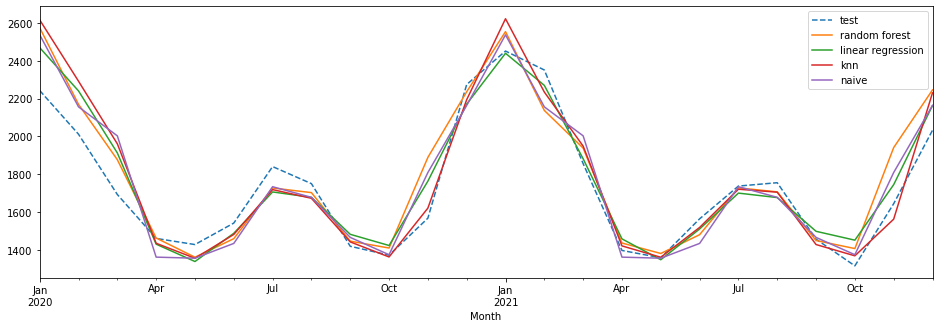

In [431]:
test.plot(style='--')
pd.Series(model_rf.predict(fh=np.arange(1,test.size+1)).reshape(-1), index=test.index).plot()
pd.Series(model_lr.predict(fh=np.arange(1,test.size+1)).reshape(-1), index=test.index).plot()
pd.Series(model_knn.predict(fh=np.arange(1,test.size+1)).reshape(-1), index=test.index).plot()
pd.Series(model_naive.predict(fh=np.arange(1,test.size+1)).reshape(-1), index=test.index).plot()

plt.legend(['test', 'random forest', 'linear regression', 'knn', 'naive'])

In [82]:
from sktime.datasets import load_gunpoint
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.classification.distance_based import KNeighborsTimeSeriesClassifier

In [89]:
X, y = load_gunpoint(return_X_y=True)

In [92]:
X_train, X_test, y_train, y_test = temporal_train_test_split(X, y)

In [93]:
x.shape
X_train.shape
y_train.shape

(150,)

In [147]:
X.shape

(200, 1)

In [137]:
from sktime.datatypes._panel._convert import from_long_to_nested, from_nested_to_long

In [138]:
X.head()

,dim_0
0,0 -0.647885 1 -0.641992 2 -0.63818...
1,0 -0.644427 1 -0.645401 2 -0.64705...
2,0 -0.778353 1 -0.778279 2 -0.77715...
3,0 -0.750060 1 -0.748103 2 -0.74616...
4,0 -0.599539 1 -0.597422 2 -0.59926...


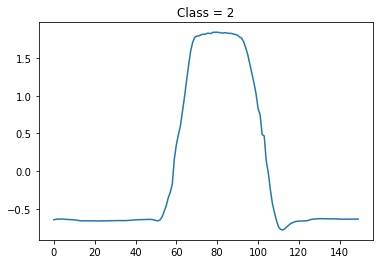

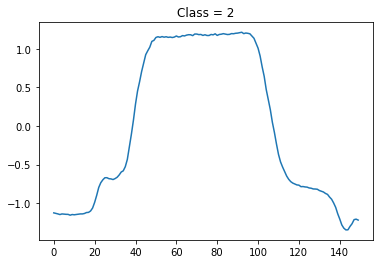

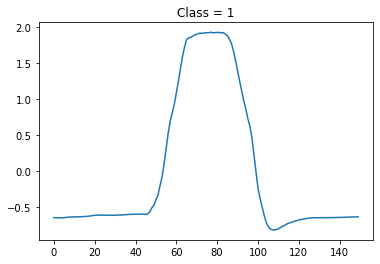

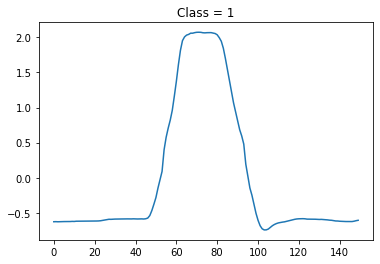

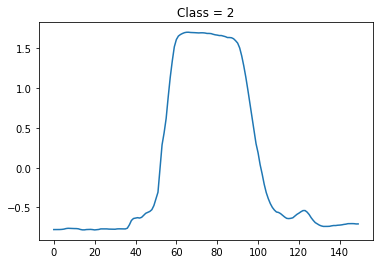

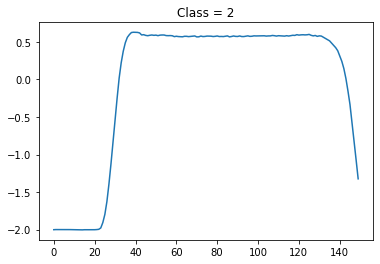

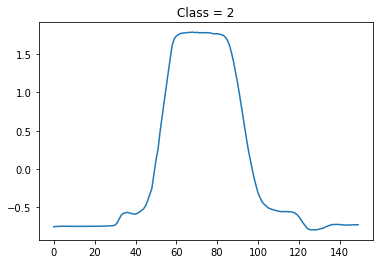

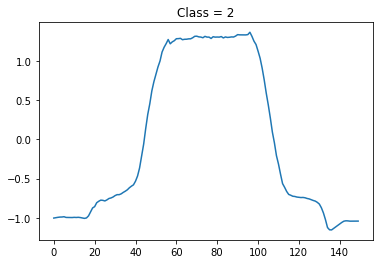

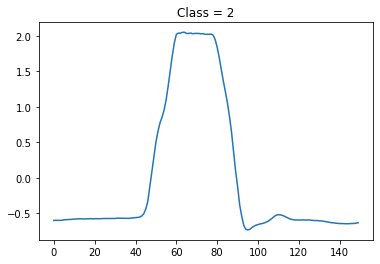

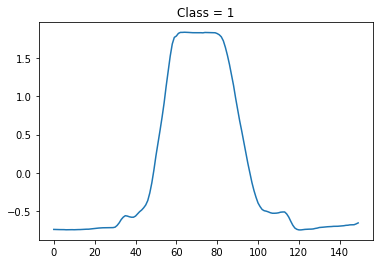

In [150]:
for i in range(10):
    from_nested_to_long(X)['value'][i].plot(title=f'Class = {y[i]}')
    plt.show()

In [136]:
from collections import Counter
Counter(y)

Counter({'2': 100, '1': 100})

In [98]:
knn = KNeighborsTimeSeriesClassifier()

In [99]:
knn.fit(X_train, y_train)

KNeighborsTimeSeriesClassifier()

In [104]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [101]:
y_pred = knn.predict(X_test)

In [103]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.86      0.96      0.91        25
           2       0.95      0.84      0.89        25

    accuracy                           0.90        50
   macro avg       0.91      0.90      0.90        50
weighted avg       0.91      0.90      0.90        50



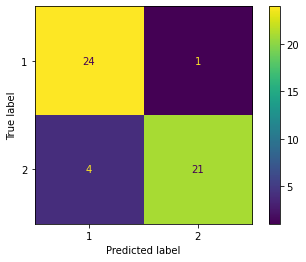

In [105]:
plot_confusion_matrix(knn, X_test, y_test)

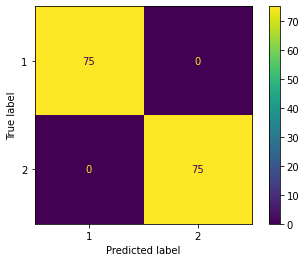

In [161]:
plot_confusion_matrix(knn, X_train, y_train)

In [162]:
from tsfresh.examples import load_robot_execution_failures
from tsfresh.examples.robot_execution_failures import download_robot_execution_failures
download_robot_execution_failures()
df_ts, y = load_robot_execution_failures()

In [ ]:
from tsfresh import extract_features
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute
extracted_features = impute(extract_features(df_ts, column_id="id",
column_sort="time"))
#features_filtered = select_features(extracted_features, y)

Feature Extraction:   0%|                                                                                                                                                                | 0/20 [00:02<?, ?it/s]


ERROR! Session/line number was not unique in database. History logging moved to new session 1169
